In [1]:
%matplotlib inline
import os

db_file = os.path.abspath("db.json")

In [2]:
from pymatgen.util.testing import PymatgenTest

struct_si = PymatgenTest.get_structure("Si")
print(struct_si)

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.840198   3.840199   3.840198
angles: 119.999991  90.000000  60.000009
Sites (2)
  #  SP       a    b     c
---  ----  ----  ---  ----
  0  Si    0     0    0
  1  Si    0.75  0.5  0.75


In [3]:
from pymatgen.io.vasp.sets import MPRelaxSet

vis = MPRelaxSet(struct_si, force_gamma=True)

In [4]:
from atomate.vasp.fireworks.core import OptimizeFW

fw1 = OptimizeFW(struct_si, vasp_input_set=vis, vasp_cmd=None, db_file=db_file)

for task in fw1.tasks:
    print(task.fw_name)

{{atomate.vasp.firetasks.write_inputs.WriteVaspFromIOSet}}
{{atomate.vasp.firetasks.run_calc.RunVaspCustodian}}
{{atomate.common.firetasks.glue_tasks.PassCalcLocs}}
{{atomate.vasp.firetasks.parse_outputs.VaspToDb}}


In [5]:
from atomate.vasp.fireworks.core import StaticFW

fw2 = StaticFW(struct_si, vasp_input_set=vis, vasp_cmd=None, db_file=db_file, 
               parents=[fw1])

for task in fw2.tasks:
    print(task.fw_name)

{{atomate.vasp.firetasks.glue_tasks.CopyVaspOutputs}}
{{atomate.vasp.firetasks.write_inputs.WriteVaspStaticFromPrev}}
{{atomate.vasp.firetasks.run_calc.RunVaspCustodian}}
{{atomate.common.firetasks.glue_tasks.PassCalcLocs}}
{{atomate.vasp.firetasks.parse_outputs.VaspToDb}}


In [6]:
from atomate.vasp.fireworks.core import NonSCFFW

fw3 = NonSCFFW(struct_si, vasp_cmd=None, db_file=db_file, 
               parents=[fw2], mode="uniform")

for task in fw3.tasks:
    print(task.fw_name)

{{atomate.vasp.firetasks.glue_tasks.CopyVaspOutputs}}
{{atomate.vasp.firetasks.write_inputs.WriteVaspNSCFFromPrev}}
{{atomate.vasp.firetasks.run_calc.RunVaspCustodian}}
{{atomate.common.firetasks.glue_tasks.PassCalcLocs}}
{{atomate.vasp.firetasks.parse_outputs.VaspToDb}}


In [7]:
fw4 = NonSCFFW(struct_si, vasp_cmd=None, db_file=db_file, 
               parents=[fw2], mode="line")

for task in fw4.tasks:
    print(task.fw_name)

{{atomate.vasp.firetasks.glue_tasks.CopyVaspOutputs}}
{{atomate.vasp.firetasks.write_inputs.WriteVaspNSCFFromPrev}}
{{atomate.vasp.firetasks.run_calc.RunVaspCustodian}}
{{atomate.common.firetasks.glue_tasks.PassCalcLocs}}
{{atomate.vasp.firetasks.parse_outputs.VaspToDb}}


In [8]:
from fireworks import Workflow

fws = [fw1, fw2, fw3, fw4]

wf = Workflow(fws)

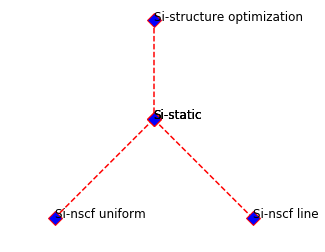

In [9]:
from fireworks.utilities.fw_utilities import plot_wf

plot_wf(wf)

In [10]:
# adjust the ref_dir path
from atomate.vasp.powerups import use_fake_vasp

reference_dir = os.path.abspath("reference_files")
ref_dirs_si = {"structure optimization": os.path.join(reference_dir, "Si_structure_optimization"),
             "static": os.path.join(reference_dir, "Si_static"),
             "nscf uniform": os.path.join(reference_dir, "Si_nscf_uniform"),
             "nscf line": os.path.join(reference_dir, "Si_nscf_line")}

wf = use_fake_vasp(wf, ref_dirs_si)

In [11]:
from fireworks import LaunchPad

lp = LaunchPad()
lp.reset("", require_password=False)

2017-07-31 10:08:01,032 INFO Performing db tune-up
2017-07-31 10:08:01,049 INFO LaunchPad was RESET.


In [12]:
lp.add_wf(wf)

2017-07-31 10:08:01,307 INFO Added a workflow. id_map: {-1: 4, -4: 1, -3: 2, -2: 3}


{-4: 1, -3: 2, -2: 3, -1: 4}

In [13]:
from fireworks import FWorker
from fireworks.core.rocket_launcher import rapidfire

rapidfire(lp)#, fworker=FWorker(env={"db_file": os.path.join(".", "db.json")}))

2017-07-31 10:08:01,414 INFO Created new dir /home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-07-31-17-08-01-414423
2017-07-31 10:08:01,415 INFO Launching Rocket
2017-07-31 10:08:01,439 INFO RUNNING fw_id: 4 in directory: /home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-07-31-17-08-01-414423
2017-07-31 10:08:01,443 INFO Task started: {{atomate.vasp.firetasks.write_inputs.WriteVaspFromIOSet}}.
2017-07-31 10:08:01,454 INFO Task completed: {{atomate.vasp.firetasks.write_inputs.WriteVaspFromIOSet}} 
2017-07-31 10:08:01,455 INFO Task started: {{atomate.vasp.firetasks.run_calc.RunVaspFake}}.
2017-07-31 10:08:01,487 INFO atomate.vasp.firetasks.run_calc RunVaspFake: verified inputs successfully
2017-07-31 10:08:01,502 INFO atomate.vasp.firetasks.run_calc RunVaspFake: ran fake VASP, generated outputs
2017-07-31 10:08:01,506 INFO Task completed: {{atomate.vasp.firetasks.run_calc.RunVaspFake}} 
2017-07-31 10:08:01,514 INFO Task started: {{atomate.common.firetasks.glue_ta

2017-07-31 10:08:06,792 INFO Task started: {{atomate.vasp.firetasks.run_calc.RunVaspFake}}.
2017-07-31 10:08:06,826 INFO atomate.vasp.firetasks.run_calc RunVaspFake: verified inputs successfully
2017-07-31 10:08:06,837 INFO atomate.vasp.firetasks.run_calc RunVaspFake: ran fake VASP, generated outputs
2017-07-31 10:08:06,838 INFO Task completed: {{atomate.vasp.firetasks.run_calc.RunVaspFake}} 
2017-07-31 10:08:06,842 INFO Task started: {{atomate.common.firetasks.glue_tasks.PassCalcLocs}}.
2017-07-31 10:08:06,843 INFO Task completed: {{atomate.common.firetasks.glue_tasks.PassCalcLocs}} 
2017-07-31 10:08:06,847 INFO Task started: {{atomate.vasp.firetasks.parse_outputs.VaspToDb}}.
2017-07-31 10:08:06,848 INFO atomate.vasp.firetasks.parse_outputs PARSING DIRECTORY: /home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-07-31-17-08-04-957109
2017-07-31 10:08:06,849 INFO atomate.vasp.drones Getting task doc for base dir :/home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-07-

/home/km/Software/matproj/pymatgen/pymatgen/symmetry/bandstructure.py:60: UserWarning: The input structure does not match the expected standard primitive! The path can be incorrect. Use at your own risk.
  warnings.warn("The input structure does not match the expected standard primitive! "


2017-07-31 10:08:07,216 INFO atomate.vasp.drones Post-processing dir:/home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-07-31-17-08-04-957109
2017-07-31 10:08:07,217 WARNING atomate.vasp.drones Transformations file does not exist.
2017-07-31 10:08:07,226 INFO atomate.vasp.drones Post-processed /home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-07-31-17-08-04-957109
2017-07-31 10:08:07,261 INFO atomate.utils.database Inserting km-UX305LA:/home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-07-31-17-08-04-957109 with taskid = 12
2017-07-31 10:08:07,276 INFO atomate.vasp.firetasks.parse_outputs Finished parsing with task_id: 12
2017-07-31 10:08:07,278 INFO Task completed: {{atomate.vasp.firetasks.parse_outputs.VaspToDb}} 
2017-07-31 10:08:07,301 INFO Rocket finished


In [14]:
from atomate.vasp.database import VaspCalcDb


vasp_db = VaspCalcDb.from_db_file(db_file)


In [15]:
def get_task_id(name):
    fw = None
    for i in lp.get_fw_ids():
        fw=lp.get_fw_by_id(i)
        if fw.name == name:
            break
    return fw.launches[-1].action.stored_data["task_id"]

In [16]:
dos_task_id = get_task_id("Si-nscf uniform")
bs_task_id = get_task_id("Si-nscf line")
print(dos_task_id, bs_task_id)

11 12


In [17]:
from pymatgen.electronic_structure.plotter import BSDOSPlotter

bs = vasp_db.get_band_structure(bs_task_id)
dos = vasp_db.get_dos(dos_task_id)

/home/km/Software/matproj/pymatgen/pymatgen/electronic_structure/plotter.py:2162: UserWarning: Cannot get element projected data; either the projection data doesn't exist, or you don't have a compound with exactly 2 or 3 unique elements.
  "Cannot get element projected data; either the projection data "
/home/km/Software/vnv35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


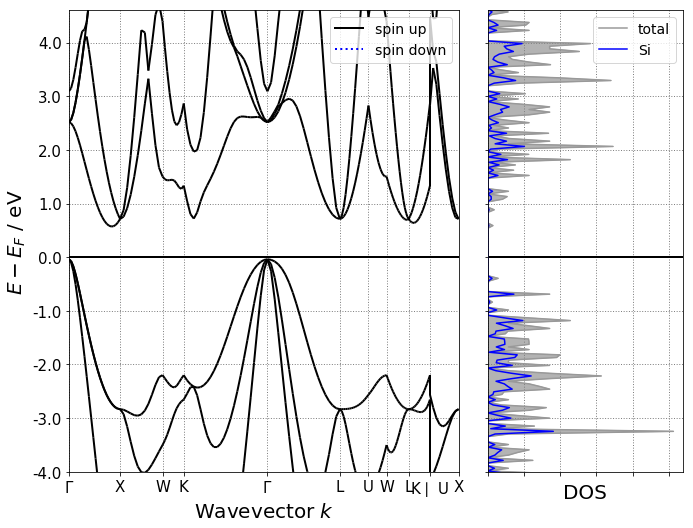

In [18]:
# Plot bandstructure and dos side by side.
plotter = BSDOSPlotter()
plt = plotter.get_plot(bs, dos)
plt.show()